"""
Created on Wed Apr  8 11:23:55 2020

@authors: abhiGambhir, eduardoAndrade
"""

In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np

# To view the results properly
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns',90)

In [2]:
# Read CSVs
google_data = pd.read_csv('datasources/google_mobility_final_df.csv')
jh_df = pd.read_csv('datasources/countermeasures_db_johnshopkins.csv')

# Dropping 1st column of jh_df dataframe
jh_df.drop('Unnamed: 0', axis=1, inplace=True)
# Converting the 'Date' column to datetime datatype
jh_df['Date'] = pd.to_datetime(jh_df['Date'])

In [3]:
google_data.columns = ['Country', 'Retail & recreation', 'Grocery & pharmacy', 'Parks', 'Transit stations', 'Workplaces', 'Residential']
 
# Striping the '%' and dividing the values by 100 for google_data    
for i in google_data.columns[1:]:
    google_data[i] = google_data[i].str.replace('%','')
    google_data[i] = google_data[i].astype(float)
    google_data[i] = google_data[i] / 100

# Selecting only the decisions made before or on 29th March because Google's data is updated till 29th march only    
jh_df = jh_df[jh_df['Date'] <= '2020-03-29']

In [4]:
# Some Prints
print(jh_df.shape)
print(google_data.shape)

print(jh_df.columns)
print(google_data.columns)

(4288, 28)
(958, 7)
Index(['Symptomatic isolation - targeted', 'Symptomatic isolation - blanket',
       'Asymptomatic isolation - targeted', 'Asymptomatic isolation - blanket',
       'Domestic travel restriction', 'Nonessential business suspension',
       'International travel restriction', 'Testing', 'Contact tracing',
       'Mask wearing', 'Hand washing', 'Gatherings banned',
       'Healthcare specialisation', 'Public education and incentives',
       'Assisting people to stay home', 'Public cleaning',
       'Miscellaneous hygiene measures', 'Public interaction and hygiene',
       'School closure', 'Activity cancellation', 'Resumption',
       'Diagnostic criteria loosened', 'Diagnostic criteria tightened',
       'Testing criteria', 'Date', 'Country', 'Confirmed Cases', 'Deaths'],
      dtype='object')
Index(['Country', 'Retail & recreation', 'Grocery & pharmacy', 'Parks',
       'Transit stations', 'Workplaces', 'Residential'],
      dtype='object')


In [5]:
# Finally merging the two dataframes on 'Country'
merged_data = pd.merge(jh_df, google_data, left_on='Country', right_on='Country', how='inner', suffixes=['_jh','_google'])
merged_data.shape

(3417, 34)

In [6]:
# These countries data are not present in GOOGLE's mobility reports
merged_data[merged_data['Retail & recreation'].isna()]['Country'].unique()

array([], dtype=object)

In [7]:
merged_data['Country'].unique().shape

(50,)

In [8]:
merged_data.head()

,Symptomatic isolation - targeted,Symptomatic isolation - blanket,Asymptomatic isolation - targeted,Asymptomatic isolation - blanket,Domestic travel restriction,Nonessential business suspension,International travel restriction,Testing,Contact tracing,Mask wearing,Hand washing,Gatherings banned,Healthcare specialisation,Public education and incentives,Assisting people to stay home,Public cleaning,Miscellaneous hygiene measures,Public interaction and hygiene,School closure,Activity cancellation,Resumption,Diagnostic criteria loosened,Diagnostic criteria tightened,Testing criteria,Date,Country,Confirmed Cases,Deaths,Retail & recreation,Grocery & pharmacy,Parks,Transit stations,Workplaces,Residential
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-23,Austria,0,0,-0.87,-0.64,-0.43,-0.71,-0.51,0.14
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-24,Austria,0,0,-0.87,-0.64,-0.43,-0.71,-0.51,0.14
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-25,Austria,0,0,-0.87,-0.64,-0.43,-0.71,-0.51,0.14
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-26,Austria,0,0,-0.87,-0.64,-0.43,-0.71,-0.51,0.14
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-27,Austria,0,0,-0.87,-0.64,-0.43,-0.71,-0.51,0.14


In [9]:
# Selecting only the recent row of the country as JH presents the data cumulatively
merged_data = merged_data.sort_values('Date').groupby('Country').tail(1)
print(merged_data.shape)
display(merged_data.describe())
print(merged_data.info())

(50, 34)


,Symptomatic isolation - targeted,Symptomatic isolation - blanket,Asymptomatic isolation - targeted,Asymptomatic isolation - blanket,Domestic travel restriction,Nonessential business suspension,International travel restriction,Testing,Contact tracing,Mask wearing,Hand washing,Gatherings banned,Healthcare specialisation,Public education and incentives,Assisting people to stay home,Public cleaning,Miscellaneous hygiene measures,Public interaction and hygiene,School closure,Activity cancellation,Resumption,Diagnostic criteria loosened,Diagnostic criteria tightened,Testing criteria,Confirmed Cases,Deaths,Retail & recreation,Grocery & pharmacy,Parks,Transit stations,Workplaces,Residential
count,2.0,4.0,11.000000,23.000000,8.0,33.000000,42.000000,36.000000,2.000000,3.0,0.0,32.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.00000,50.000000,50.000000,50.000000,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1.0,2.0,1.636364,1.956522,2.0,0.818182,5.261905,34678.333333,1500.000000,100.0,NaN,109.437500,0.400000,0.240000,0.340000,0.140000,0.0,0.48000,2.000000,1.440000,0.020000,0.0,0.020000,0.040000,8424.520000,493.340000,-0.639400,-0.390600,-0.318200,-0.604400,-0.377200,0.142000
std,0.0,0.0,0.504525,0.767420,0.0,0.244252,1.307754,66458.448417,707.106781,0.0,NaN,216.121223,0.782461,0.517451,0.626295,0.404566,0.0,1.01499,1.087968,1.605602,0.141421,0.0,0.141421,0.156492,19801.597988,1806.366435,0.221123,0.240496,0.340574,0.172983,0.166182,0.061677
min,1.0,2.0,1.000000,1.000000,2.0,0.500000,1.000000,278.000000,1000.000000,100.0,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,5.000000,0.000000,-0.940000,-0.920000,-0.900000,-0.880000,-0.720000,-0.020000
25%,1.0,2.0,1.000000,1.000000,2.0,0.500000,5.000000,3155.500000,1250.000000,100.0,NaN,2.750000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,362.250000,3.000000,-0.810000,-0.530000,-0.550000,-0.735000,-0.507500,0.110000
50%,1.0,2.0,2.000000,2.000000,2.0,1.000000,6.000000,10797.000000,1500.000000,100.0,NaN,17.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,2.000000,1.000000,0.000000,0.0,0.000000,0.000000,1260.000000,16.000000,-0.670000,-0.380000,-0.405000,-0.610000,-0.375000,0.135000
75%,1.0,2.0,2.000000,2.500000,2.0,1.000000,6.000000,23532.000000,1750.000000,100.0,NaN,100.000000,0.750000,0.000000,1.000000,0.000000,0.0,0.00000,3.000000,3.000000,0.000000,0.0,0.000000,0.000000,5542.500000,82.500000,-0.500000,-0.225000,-0.165000,-0.530000,-0.280000,0.177500
max,1.0,2.0,2.000000,3.000000,2.0,1.000000,6.000000,316664.000000,2000.000000,100.0,NaN,1000.000000,3.000000,2.000000,3.000000,2.000000,0.0,4.00000,4.000000,7.000000,1.000000,0.0,1.000000,0.900000,97689.000000,10779.000000,-0.090000,0.110000,0.510000,-0.070000,0.030000,0.300000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1071 to 3416
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Symptomatic isolation - targeted   2 non-null      float64       
 1   Symptomatic isolation - blanket    4 non-null      float64       
 2   Asymptomatic isolation - targeted  11 non-null     float64       
 3   Asymptomatic isolation - blanket   23 non-null     float64       
 4   Domestic travel restriction        8 non-null      float64       
 5   Nonessential business suspension   33 non-null     float64       
 6   International travel restriction   42 non-null     float64       
 7   Testing                            36 non-null     float64       
 8   Contact tracing                    2 non-null      float64       
 9   Mask wearing                       3 non-null      float64       
 10  Hand washing                       

In [10]:
# Filling up NaNs (Needs a thought over the technique again as some of the data in JH seems incorrect)

merged_data['Asymptomatic isolation - targeted'].fillna(0, inplace=True)
merged_data['Asymptomatic isolation - blanket'].fillna(0, inplace=True)

merged_data['Nonessential business suspension'].fillna(round(merged_data['Nonessential business suspension'].mean(),1), inplace=True)
merged_data['International travel restriction'].fillna(round(merged_data['International travel restriction'].mean(),0), inplace=True)
merged_data['Testing'].fillna(round(merged_data['Testing'].mean(),0), inplace=True)
merged_data['Gatherings banned'].fillna(0,inplace=True)

# After analysis found out 'Gatherings banned' is not at all usefull
del merged_data['Gatherings banned']

merged_data.head()
# corr_matrix = merged_data.corr()
# print(corr_matrix["Parks"].sort_values(ascending=False))

,Symptomatic isolation - targeted,Symptomatic isolation - blanket,Asymptomatic isolation - targeted,Asymptomatic isolation - blanket,Domestic travel restriction,Nonessential business suspension,International travel restriction,Testing,Contact tracing,Mask wearing,Hand washing,Healthcare specialisation,Public education and incentives,Assisting people to stay home,Public cleaning,Miscellaneous hygiene measures,Public interaction and hygiene,School closure,Activity cancellation,Resumption,Diagnostic criteria loosened,Diagnostic criteria tightened,Testing criteria,Date,Country,Confirmed Cases,Deaths,Retail & recreation,Grocery & pharmacy,Parks,Transit stations,Workplaces,Residential
1071,NaN,NaN,0.0,0.0,NaN,0.8,5.0,8284.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2020-03-29,Romania,1815,43,-0.81,-0.53,-0.60,-0.72,-0.39,0.15
2746,NaN,NaN,0.0,0.0,NaN,0.5,5.0,2900.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,2020-03-29,Turkey,9217,131,-0.75,-0.39,-0.58,-0.71,-0.45,0.17
1875,NaN,NaN,0.0,2.0,NaN,1.0,4.0,3000.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2020-03-29,Finland,1240,11,-0.52,-0.21,0.48,-0.59,-0.25,0.09
468,NaN,NaN,2.0,0.0,NaN,0.8,5.0,14901.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.3,2020-03-29,Japan,1866,54,-0.26,-0.07,-0.25,-0.41,-0.09,0.07
2947,NaN,NaN,0.0,0.0,NaN,0.5,6.0,43735.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2020-03-29,Norway,4284,25,-0.65,-0.32,-0.05,-0.57,-0.34,0.11


In [11]:
# corr_matrix = merged_data.corr()
# print(corr_matrix["Retail & recreation"].sort_values(ascending=False))

In [12]:
# Preparing Data for Correlations among features
corr_data = merged_data[['Asymptomatic isolation - targeted', 'Asymptomatic isolation - blanket',
       'Nonessential business suspension',
       'International travel restriction', 'Testing',
       'Healthcare specialisation', 'Public education and incentives',
       'Assisting people to stay home', 'Public cleaning',
       'Miscellaneous hygiene measures', 'Public interaction and hygiene',
       'School closure', 'Activity cancellation', 'Resumption',
       'Diagnostic criteria loosened', 'Diagnostic criteria tightened',
       'Testing criteria','Confirmed Cases', 'Deaths', 'Retail & recreation', 'Grocery & pharmacy', 'Parks',
       'Transit stations', 'Workplaces', 'Residential']]

print(corr_data.shape)

(50, 25)


In [13]:
# To check if there is no NaNs left
print(corr_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1071 to 3416
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Asymptomatic isolation - targeted  50 non-null     float64
 1   Asymptomatic isolation - blanket   50 non-null     float64
 2   Nonessential business suspension   50 non-null     float64
 3   International travel restriction   50 non-null     float64
 4   Testing                            50 non-null     float64
 5   Healthcare specialisation          50 non-null     float64
 6   Public education and incentives    50 non-null     float64
 7   Assisting people to stay home      50 non-null     float64
 8   Public cleaning                    50 non-null     float64
 9   Miscellaneous hygiene measures     50 non-null     float64
 10  Public interaction and hygiene     50 non-null     float64
 11  School closure                     50 non-null     floa

# Feature Scaling


In [14]:
# Importing Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
corr_data = sc.fit_transform(corr_data)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [15]:
corr_data = pd.DataFrame(corr_data)
corr_data.columns = ['Asymptomatic isolation - targeted', 'Asymptomatic isolation - blanket',
       'Nonessential business suspension',
       'International travel restriction', 'Testing',
       'Healthcare specialisation', 'Public education and incentives',
       'Assisting people to stay home', 'Public cleaning',
       'Miscellaneous hygiene measures', 'Public interaction and hygiene',
       'School closure', 'Activity cancellation', 'Resumption',
       'Diagnostic criteria loosened', 'Diagnostic criteria tightened',
       'Testing criteria','Confirmed Cases', 'Deaths', 'Retail & recreation', 'Grocery & pharmacy', 'Parks',
       'Transit stations', 'Workplaces', 'Residential']
corr_data.head(20)

,Asymptomatic isolation - targeted,Asymptomatic isolation - blanket,Nonessential business suspension,International travel restriction,Testing,Healthcare specialisation,Public education and incentives,Assisting people to stay home,Public cleaning,Miscellaneous hygiene measures,Public interaction and hygiene,School closure,Activity cancellation,Resumption,Diagnostic criteria loosened,Diagnostic criteria tightened,Testing criteria,Confirmed Cases,Deaths,Retail & recreation,Grocery & pharmacy,Parks,Transit stations,Workplaces,Residential
0,-0.503903,-0.818182,-0.061352,-0.185168,-0.474690,0.774597,1.483651,-0.548387,-0.349563,0.0,-0.477712,-0.928477,-0.276823,-0.142857,0.0,-0.142857,-0.258199,-0.337176,-0.251838,-0.779348,-0.585520,-0.835827,-0.675059,-0.077806,0.131024
1,-0.503903,-0.818182,-1.595162,-0.185168,-0.571519,-0.516398,-0.468521,-0.548387,-0.349563,0.0,-0.477712,0.928477,0.981462,-0.142857,0.0,-0.142857,-0.258199,0.040427,-0.202627,-0.505251,0.002520,-0.776507,-0.616663,-0.442521,0.458585
2,-0.503903,1.000000,0.961187,-1.026843,-0.569720,0.774597,-0.468521,-0.548387,-0.349563,0.0,-0.477712,0.000000,-0.905965,-0.142857,0.0,-0.142857,-0.258199,-0.366509,-0.269733,0.545452,0.758572,2.367486,0.084090,0.773196,-0.851658
3,2.295559,-0.818182,-0.061352,-0.185168,-0.355686,0.774597,1.483651,-0.548387,-0.349563,0.0,2.507990,-1.856953,-0.276823,-0.142857,0.0,-0.142857,1.678293,-0.334574,-0.245687,1.733204,1.346611,0.202283,1.135220,1.745771,-1.179219
4,-0.503903,-0.818182,-1.595162,0.656506,0.162882,-0.516398,-0.468521,-0.548387,-0.349563,0.0,-0.477712,0.928477,-0.905965,-0.142857,0.0,-0.142857,-0.258199,-0.211223,-0.261904,-0.048424,0.296540,0.795489,0.200882,0.226123,-0.524097
5,-0.503903,-0.818182,0.961187,0.656506,-0.000004,-0.516398,-0.468521,-0.548387,-0.349563,0.0,-0.477712,0.928477,-0.905965,-0.142857,0.0,-0.142857,-0.258199,-0.416349,-0.274766,-0.139789,-0.207494,-0.331602,-0.441474,0.043766,-0.360317
6,0.895828,-0.818182,-0.061352,-0.185168,0.364687,-0.516398,-0.468521,-0.548387,-0.349563,0.0,1.512756,-1.856953,-0.905965,-0.142857,0.0,-0.142857,-0.258199,-0.109400,-0.240095,0.225673,0.170532,0.469226,-0.324682,-0.381735,-0.032756
7,0.895828,-0.818182,-0.061352,-2.710192,-0.618675,-0.516398,-0.468521,-0.548387,-0.349563,0.0,0.517522,0.928477,0.352320,-0.142857,0.0,-0.142857,-0.258199,-0.386506,-0.266937,0.865231,0.842577,-0.420583,0.784843,1.077126,-0.524097
8,-0.503903,1.909091,0.961187,0.656506,-0.084136,-0.516398,-0.468521,1.064516,-0.349563,0.0,-0.477712,0.928477,0.981462,-0.142857,0.0,-0.142857,-0.258199,3.656941,3.528475,-1.373224,-1.551585,-1.695976,-1.609396,-1.597453,1.277487
9,-0.503903,1.000000,0.961187,0.656506,-0.000004,-0.516398,-0.468521,-0.548387,-0.349563,0.0,-0.477712,0.000000,0.981462,-0.142857,0.0,-0.142857,-0.258199,-0.413288,-0.272529,-0.550934,-0.459511,0.291264,0.084090,-0.746451,-0.196537


In [16]:
# for cols in corr_data.columns[0:-8]:
#     print('*'*10, cols)
#     print(corr_data[cols].unique())
#     print()
    
# print(corr_data.info())

# print(corr_data.min())

# Feature Importance for 'Retail & recreation' - Embedded Method

In [17]:
from sklearn.linear_model import LassoCV

X = corr_data.loc[:, corr_data.columns != 'Retail & recreation']
y = corr_data['Retail & recreation']

reg = LassoCV(cv=5)
reg.fit(X,y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.019002
Best score using built-in LassoCV: 0.961889


In [18]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 13 variables and eliminated the other 11 variables


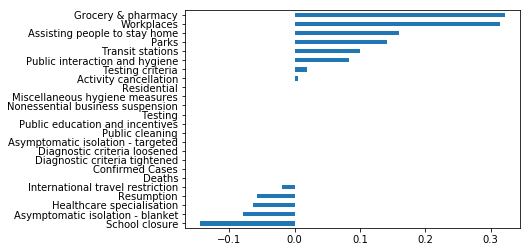

In [19]:
imp_coef = coef.sort_values()
import matplotlib as plt
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")

# Feature Importance for 'Grocery & pharmacy' - Embedded Method

Best alpha using built-in LassoCV: 0.094575
Best score using built-in LassoCV: 0.783986
Lasso picked 3 variables and eliminated the other 21 variables


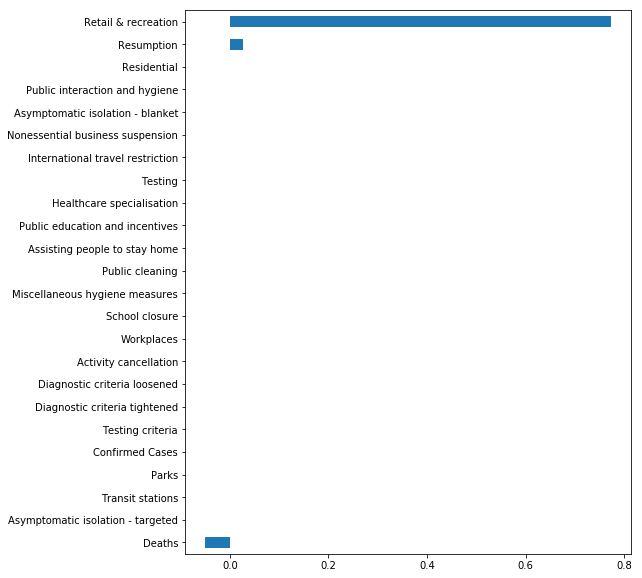

In [20]:
X = corr_data.loc[:, corr_data.columns != 'Grocery & pharmacy']
y = corr_data['Grocery & pharmacy']

reg = LassoCV(cv=5)
reg.fit(X,y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib as plt
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")

# Feature Importance for 'Parks' - Embedded Method

Best alpha using built-in LassoCV: 0.066982
Best score using built-in LassoCV: 0.749405
Lasso picked 8 variables and eliminated the other 16 variables


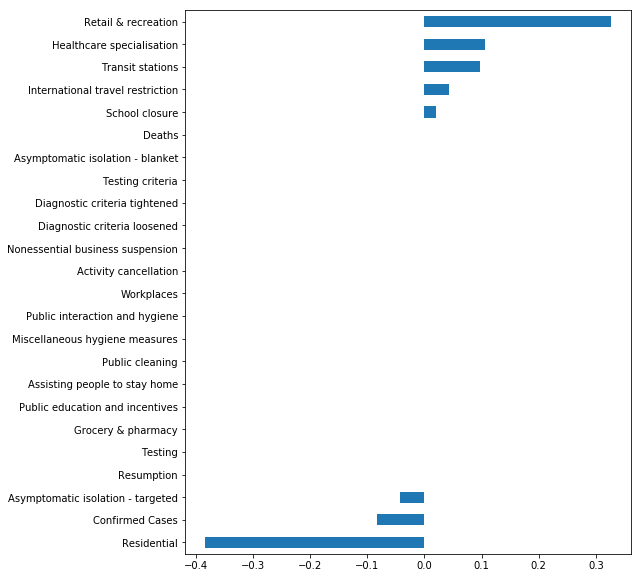

In [21]:
X = corr_data.loc[:, corr_data.columns != 'Parks']
y = corr_data['Parks']

reg = LassoCV(cv=5)
reg.fit(X,y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib as plt
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")

# Feature Importance for 'Transit stations' - Embedded Method

Best alpha using built-in LassoCV: 0.123525
Best score using built-in LassoCV: 0.793738
Lasso picked 4 variables and eliminated the other 20 variables


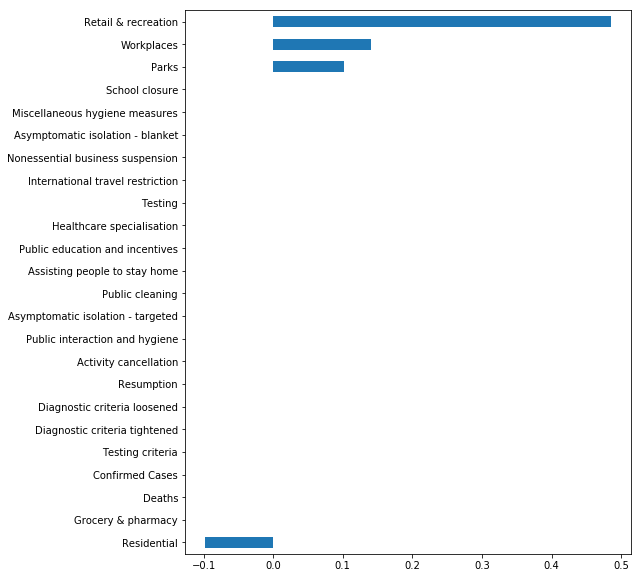

In [22]:
X = corr_data.loc[:, corr_data.columns != 'Transit stations']
y = corr_data['Transit stations']

reg = LassoCV(cv=5)
reg.fit(X,y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib as plt
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")

# Feature Importance for 'Workplaces' - Embedded Method

Best alpha using built-in LassoCV: 0.076596
Best score using built-in LassoCV: 0.892291
Lasso picked 3 variables and eliminated the other 21 variables


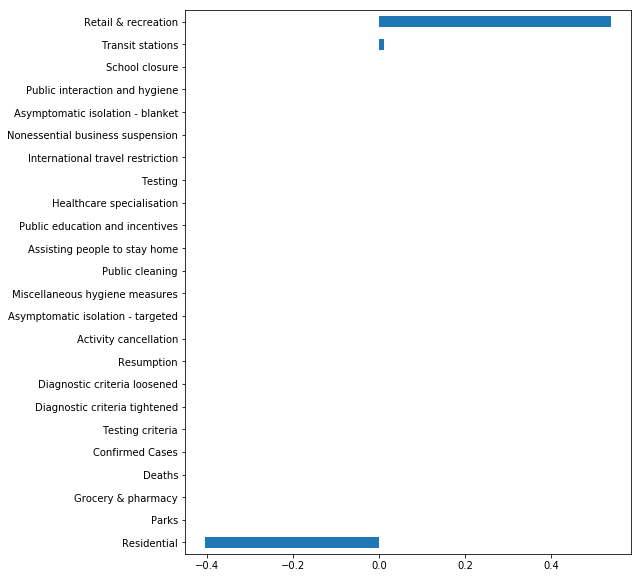

In [23]:
X = corr_data.loc[:, corr_data.columns != 'Workplaces']
y = corr_data['Workplaces']

reg = LassoCV(cv=5)
reg.fit(X,y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib as plt
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")

# Feature Importance for 'Residential' - Embedded Method

Best alpha using built-in LassoCV: 0.088812
Best score using built-in LassoCV: 0.731736
Lasso picked 6 variables and eliminated the other 18 variables


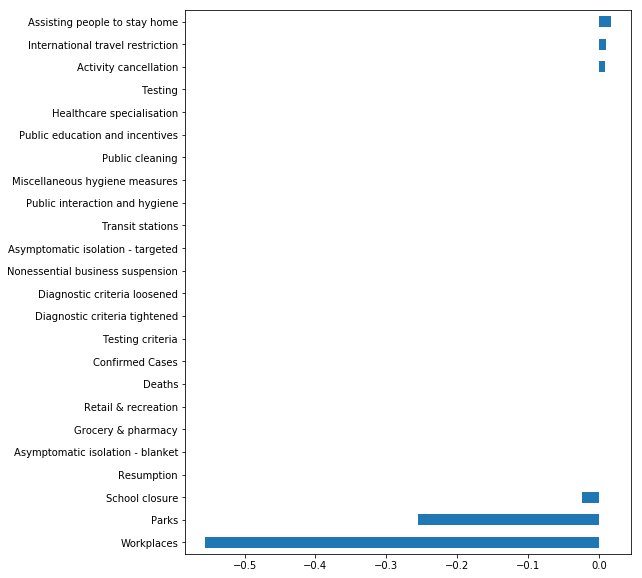

In [24]:
X = corr_data.loc[:, corr_data.columns != 'Residential']
y = corr_data['Residential']

reg = LassoCV(cv=5)
reg.fit(X,y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib as plt
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")

# Scatter plots to ensure linearity relation

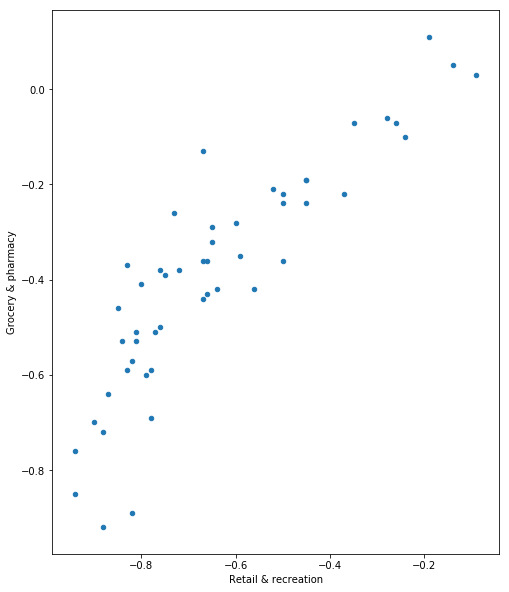

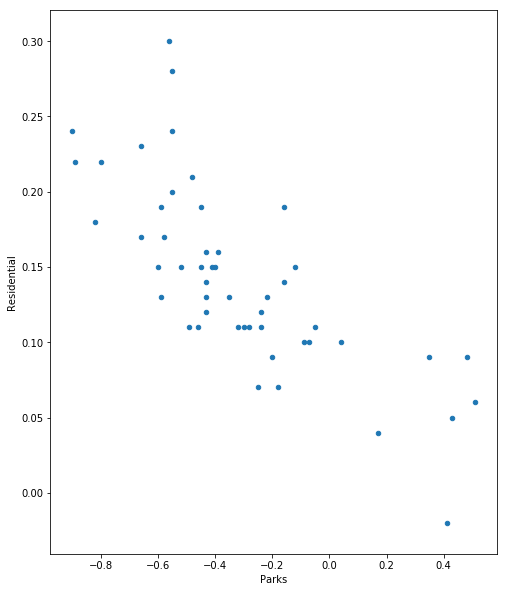

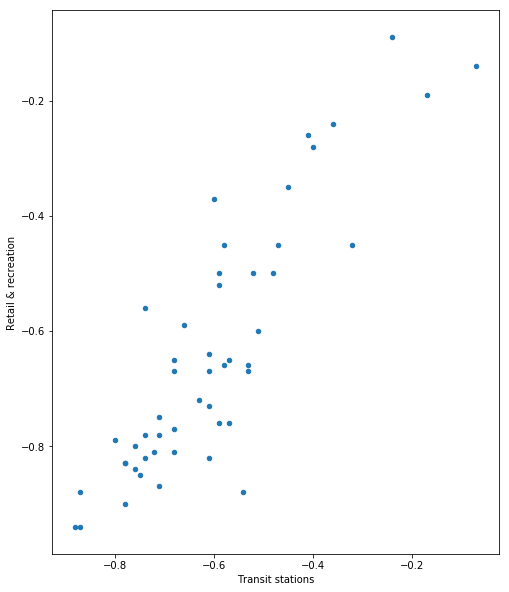

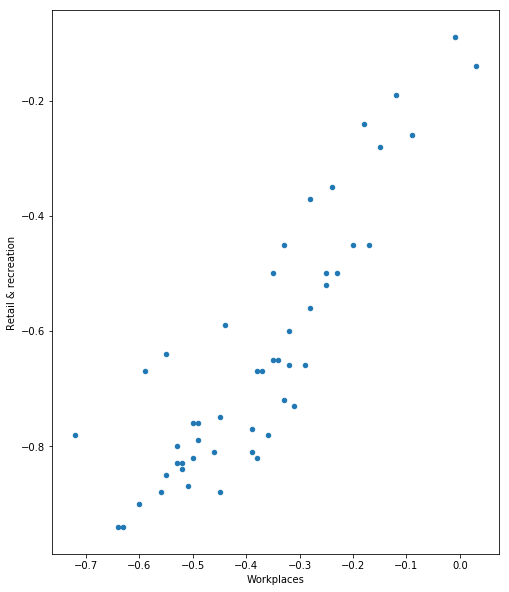

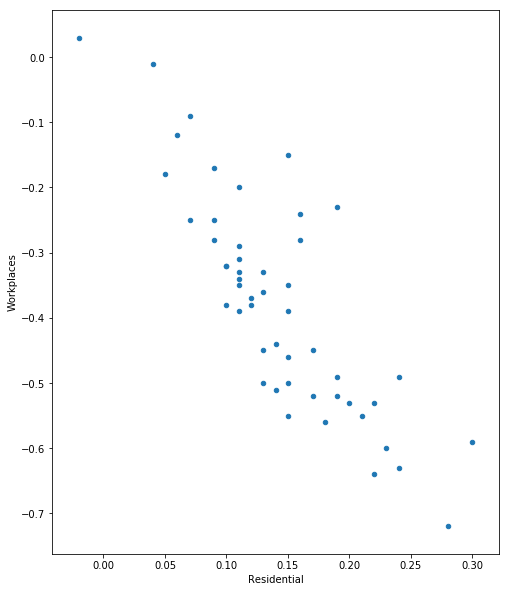

In [33]:
merged_data.plot.scatter('Retail & recreation','Grocery & pharmacy')
merged_data.plot.scatter('Parks','Residential')
merged_data.plot.scatter('Transit stations','Retail & recreation')
merged_data.plot.scatter('Workplaces','Retail & recreation')
merged_data.plot.scatter('Residential','Workplaces')